In [255]:
#Importing the libraries and functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

In [256]:
#Read the csv

df = pd.read_csv('neo.csv')
df

#We have a clean dataframe.

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [257]:
#Data wrangling

In [258]:
#Dropping dataframe columns unrelated to the prediction problem

df = df.drop(['id', 'name'], axis=1)
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [259]:
#Encoding categorical variables

encode_orb = LabelEncoder()
df['orbiting_body'] = encode_orb.fit_transform(df['orbiting_body'])
encode_sentry = LabelEncoder()
df['sentry_object'] = encode_sentry.fit_transform(df['sentry_object'])
encode_hazardous = LabelEncoder()
df['hazardous'] = encode_hazardous.fit_transform(df['hazardous'])
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,0,0,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,0,0,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,0,0,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,0,0,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,0,0,20.09,1
...,...,...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,0,0,25.00,0
90832,0.016771,0.037501,46114.605073,5.432121e+07,0,0,26.00,0
90833,0.031956,0.071456,7566.807732,2.840077e+07,0,0,24.60,0
90834,0.007321,0.016370,69199.154484,6.869206e+07,0,0,27.80,0


In [260]:
#Exploratory data analysis
#Feature engineering

In [261]:
#Checking for class imbalance

df['hazardous'].value_counts()

#Nearly 90% of the data accounts for a non-hazardous asteroid. Hence, we require the proper handling for class imbalance to
#avoid unnecesssary results.

0    81996
1     8840
Name: hazardous, dtype: int64

In [262]:
#Describe the dataframe

df.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.0,90836.0,90836.000000,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,0.0,0.0,23.527103,0.097318
std,0.298511,0.667491,25293.296961,2.235204e+07,0.0,0.0,2.894086,0.296392
min,0.000609,0.001362,203.346433,6.745533e+03,0.0,0.0,9.230000,0.000000
25%,0.019256,0.043057,28619.020645,1.721082e+07,0.0,0.0,21.340000,0.000000
50%,0.048368,0.108153,44190.117890,3.784658e+07,0.0,0.0,23.700000,0.000000
75%,0.143402,0.320656,62923.604633,5.654900e+07,0.0,0.0,25.700000,0.000000
max,37.892650,84.730541,236990.128088,7.479865e+07,0.0,0.0,33.200000,1.000000


In [263]:
df['orbiting_body'].unique()

array([0])

In [264]:
df['sentry_object'].unique()

array([0], dtype=int64)

In [265]:
#Orbiting body and sentry objects do not have distinct values for the given data. Dropping these columns.

df = df.drop(['orbiting_body', 'sentry_object'], axis=1)

In [266]:
#Data visualisation

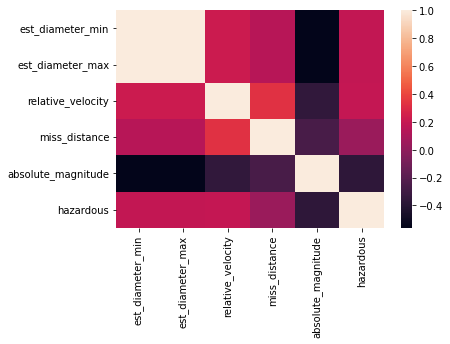

In [267]:
#Checking correlation plot for the data columns

corr = df.corr()
sns.heatmap(corr)
plt.show()

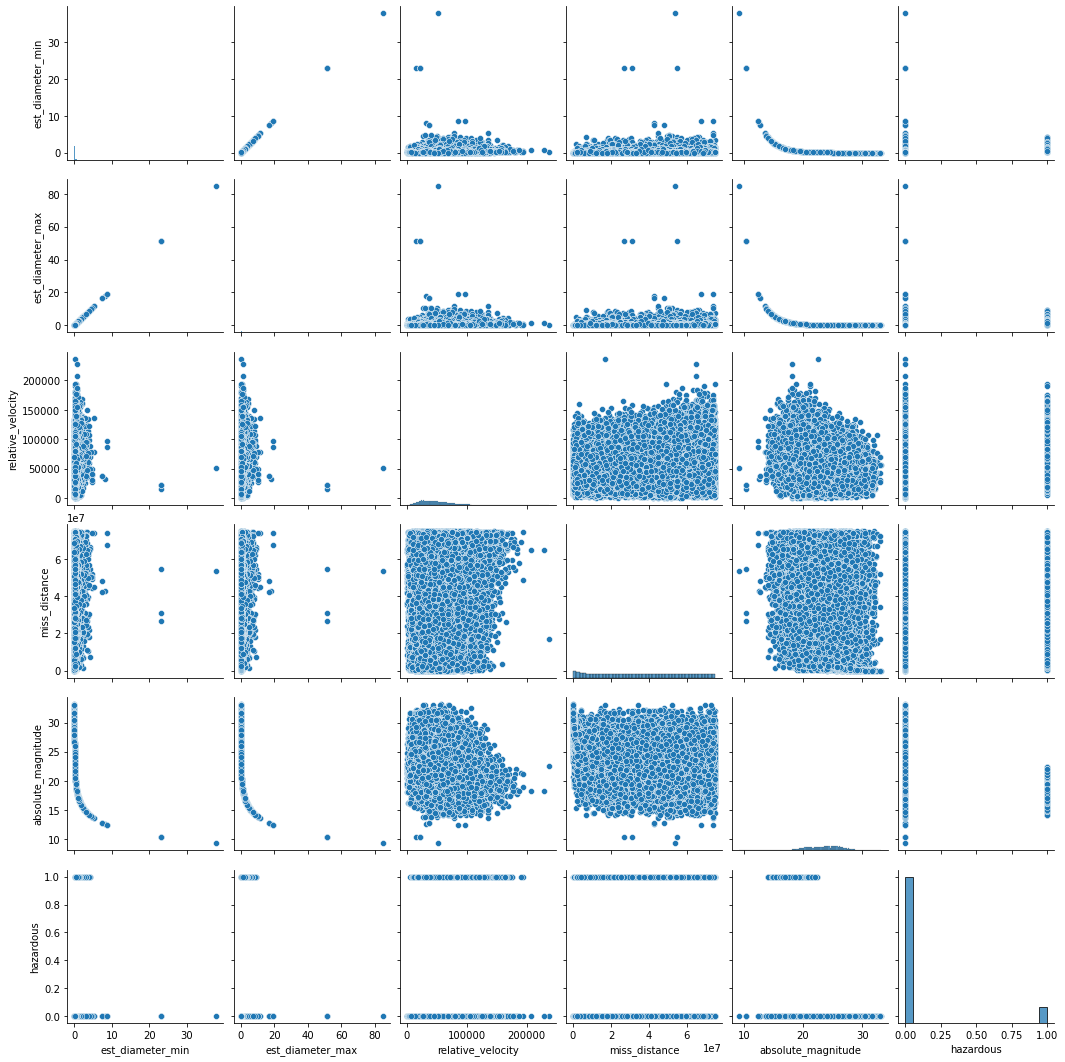

In [268]:
#Bivariate analysis by pairplot

sns.pairplot(df[df.columns])
plt.show()

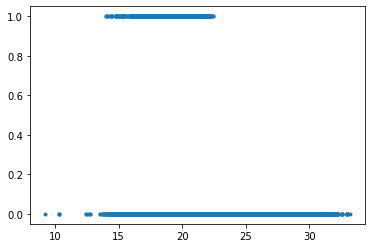

In [269]:
#Relation between absolute magnitude and hazardous objects

plt.scatter(df['absolute_magnitude'], df['hazardous'], marker='.')
plt.show()

#Most of the objects marked hazardous exist between the magnitude range of 15 to 25.

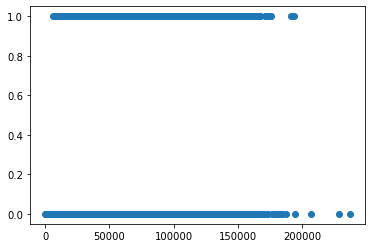

In [270]:
#Relation between relative velocity and hazardous objects

plt.scatter(df['relative_velocity'], df['hazardous'])
plt.show()

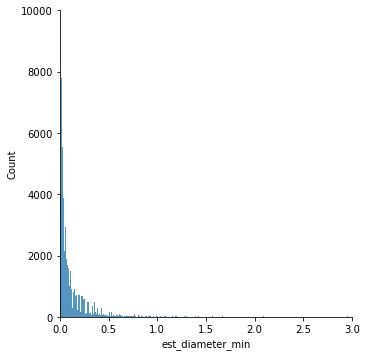

In [271]:
#Distribution plot of estimated minimum diameter

sns.displot(df['est_diameter_min'])
plt.xlim([0,3])
plt.ylim([0, 10000])

plt.show()

In [272]:
#Training the model

In [273]:
#Handling class imbalance using SMOTE

from imblearn.over_sampling import SMOTE

In [274]:
y = df['hazardous']

In [275]:
df = df.drop(['hazardous'], axis=1)
X  = df

In [276]:
X, y = SMOTE().fit_resample(X, y)

In [277]:
X

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,16.730000
1,0.265800,0.594347,73588.726663,6.143813e+07,20.000000
2,0.722030,1.614507,114258.692129,4.979872e+07,17.830000
3,0.096506,0.215794,24764.303138,2.543497e+07,22.200000
4,0.255009,0.570217,42737.733765,4.627557e+07,20.090000
...,...,...,...,...,...
163987,0.143269,0.320360,43263.364344,1.046468e+07,21.349824
163988,0.144897,0.323999,70342.326914,4.734931e+07,21.346867
163989,0.524565,1.172963,36941.549439,7.726025e+06,19.527565
163990,0.221932,0.496255,21829.380858,7.243626e+07,20.409181


In [278]:
#Splitting train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21)

In [279]:
#Feature Scaling

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
cols = X.columns
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = cols)
X_test = pd.DataFrame(X_test, columns = cols)
X_train

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.000970,0.000970,0.333161,0.237227,0.627034
1,0.000666,0.000666,0.097173,0.583967,0.660409
2,0.006480,0.006480,0.245661,0.546413,0.456484
3,0.003650,0.003650,0.535407,0.319514,0.508900
4,0.003341,0.003341,0.315331,0.737728,0.516062
...,...,...,...,...,...
122989,0.000867,0.000867,0.064442,0.097190,0.637046
122990,0.000689,0.000689,0.160302,0.097568,0.657489
122991,0.004904,0.004904,0.337910,0.690203,0.485255
122992,0.000112,0.000112,0.135771,0.695480,0.812265


In [280]:
#Evaluating raw model performance

from sklearn.dummy import DummyClassifier
models = [DummyClassifier, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier]
for model in models:
    modelname = model
    modelname = model().fit(X_train, y_train)
    y_pred = modelname.predict(X_test)
    print(model, "has the accuracy score of", accuracy_score(y_test, y_pred))


<class 'sklearn.dummy.DummyClassifier'> has the accuracy score of 0.498048685301722
<class 'sklearn.linear_model._logistic.LogisticRegression'> has the accuracy score of 0.8570174154836822
<class 'sklearn.tree._classes.DecisionTreeClassifier'> has the accuracy score of 0.9375091467876482
<class 'sklearn.ensemble._forest.RandomForestClassifier'> has the accuracy score of 0.94819259476072
<class 'xgboost.sklearn.XGBClassifier'> has the accuracy score of 0.9384848041367871


In [281]:
#Random forest classifier gives the best score for default value of parameters, compared to the marginal difference for other classifiers

In [282]:
#Hyperparameter tuning

for a in [5, 10, 50, 100]:
    rfc = RandomForestClassifier(n_estimators = a).fit(X_train, y_train)
    y_pred_test = rfc.predict(X_test)
    print(accuracy_score(y_test, y_pred_test))

0.9419239962925021
0.945363188448217
0.9478267232547929
0.9484121176642764


In [283]:
for a in [50, 60, 70]:
    rfc = RandomForestClassifier(n_estimators = a, n_jobs=-1, random_state = 21).fit(X_train, y_train)
    y_pred_test = rfc.predict(X_test)
    print(accuracy_score(y_test, y_pred_test))

0.9477047660861505
0.9478267232547929
0.947777940387336


In [284]:
#Random forest classifier model

rfc = RandomForestClassifier(n_estimators = 70, n_jobs = -1).fit(X_train, y_train)
y_pred_test = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.9481438118932631
